# Getting Started with GEDI L2A Version 2 Data in Python

In this tutorial, our main focus is the Reynolds Creek Experimental Watershed (RCEW), Idaho. RCEW has a semi-arid ecosystem. 

### This tutorial demonstrates how to work with the Elevation and Height Metrics ([GEDI02_A.002](https://doi.org/10.5067/GEDI/GEDI02_A.002)) data product.
The Global Ecosystem Dynamics Investigation ([GEDI](https://lpdaac.usgs.gov/data/get-started-data/collection-overview/missions/gedi-overview/)) mission aims to characterize ecosystem structure and dynamics to enable radically improved quantification and understanding of the Earth's carbon cycle and biodiversity. The GEDI instrument produces high resolution laser ranging observations of the 3-dimensional structure of the Earth. GEDI is attached to the International Space Station and collects data globally between 51.6 N and 51.6 S latitudes at the highest resolution and densest sampling of any light detection and ranging (lidar) instrument in orbit to date. The Land Processes Distributed Active Archive Center (LP DAAC) distributes the GEDI Level 1 and Level 2 Version 1 and Version 2 products. The L1B and L2 GEDI products are archived and distributed in the HDF-EOS5 file format. 

---
## Use Case Example:  
This tutorial was developed using an example use case for a project being worked on by Titus Nyarko. This projects counts towards his Ph.D **The goal of the project is to use GEDI L2A Version 2 data to observe tree canopy height and profile over RCEW.** 

This tutorial will show how to use Python to open GEDI L2A Version 2 files, visualize the sub-orbit of GEDI points (shots), subset to a region of interest, visualize GEDI canopy height, and export subsets of GEDI science dataset (SDS) layers as GeoJSON files that can be loaded into GIS and/or Remote Sensing software programs.  
  
  
***    
### Data Used in the Example:    
- **GEDI L2A Elevation and Height Metrics Data Global Footprint Level - [GEDI02_A.002](https://doi.org/10.5067/GEDI/GEDI02_A.002)**
     - _The purpose of the L2A dataset is to provide waveform interpretation and extracted products from each GEDI waveform. This includes ground elevation, canopy top height, relative return energy metrics (describing canopy vertical structure, for example), and many other interpreted products from the return waveforms._
     - **Science Dataset (SDS) layers:**
        - /rh  
        - /elev_lowestmode  
        - /elev_highestreturn   
        - /lat_lowestmode  
        - /lon_lowestmode  
        - /shot_number  
        - /quality_flag   
        - /digital_elevation_model  
        - /degrade_flag  
        - /sensitivity  
        - /selected_algorithm
***  
# Topics Covered:
1. [**Get Started**](#getstarted)  
    1.1 Import Packages    
    1.2 Set Up the Working Environment and Retrieve Files      
2. [**Import and Interpret Data**](#importinterpret)      
    2.1 Open a GEDI HDF5 File and Read File Metadata     
    2.2 Read SDS Metadata and Subset by Beam   
3. [**Visualize a GEDI Sub-Orbit**](#visualizeorbit)      
    3.1 Subset by Layer and Create a Geodataframe   
    3.2 Visualize a Geodataframe
4. [**Work with GEDI L2A Data**](#L2A)   
    4.1 Import and Extract Specific Shots  
    4.2 Plot Relative Height Metrics  
    4.3 Combine RH Metrics and Waveforms  
    4.4 Select Data from non-Default Algorithm    
5. [**Plot Transects**](#plottransects)      
    5.1 Quality Filtering    
    5.2 Plot Beam Transects 
    5.3 Subset Beam Transects  
    5.4 Plot RH Metrics Transects    
6. [**Spatial Visualization**](#spatialvisualization)      
    6.1 Import, Subset, and Quality Filter all Beams  
    6.2 Spatial Subsetting  
    6.3 Visualize All Beams: Canopy Height and Elevation  
7. [**Export Subsets as GeoJSON Files**](#exportgeojson)               
***
<!-- # Before Starting this Tutorial:

This tutorial requires a compatible Python Environment and GEDI L2A Version 2 granule from June 19, 2019 (orbit 02932, sub-orbit `02`) to download. To setup the Python environment and download the file, follow the steps in sections 1 and 2 of the [set-up instruction](https://github.com/nasa/GEDI-Data-Resources/Setup/setup_instructions.md).  

## Source Code used to Generate this Tutorial:
The repository containing all of the required files is located at: https://github.com/nasa/GEDI-Data-Resources       -->

<div class="alert alert-block alert-warning" >
<b>NOTE:</b> This tutorial was developed for GEDI L2A Version 2 files and should only be used for those products. </div>   


# 1. Get Started <a id="getstarted"></a>

## 1.1 Import Packages <a id="1.1"></a>
#### Import the required packages and set the input/working directory to run this Jupyter Notebook locally.

ERROR 1: PROJ: proj_create_from_database: Open of /bsuhome/tnde/miniconda3/envs/lpdaac_tutorials/share/proj failed


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
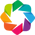

In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
import geoviews as gv
from geoviews import opts, tile_sources as gvts
import holoviews as hv
gv.extension('bokeh', 'matplotlib')
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

os.chdir('../../') 

## 1.2 Set Up the Working Environment and Retrieve Files<a id="1.2"></a>
#### The input directory is defined as the current working directory. Note that you will need to have the Jupyter Notebook and example data (.h5 and .geojson) stored in this directory in order to execute the tutorial successfully. If the example data is stored in a different directory, specify the path to the example data below.

In [2]:
inDir = "/bsuhome/tnde/scratch/carbon_estimation/data/gedi_data/gedi_finder/gedi02_A_002"
inDir

'/bsuhome/tnde/scratch/carbon_estimation/data/gedi_data/gedi_finder/gedi02_A_002'

In [3]:
out_dir = "/bsuhome/tnde/scratch/carbon_estimation/data/gedi_data/gedi_finder/gedi02_A_002/"
# gediFiles = [g for g in os.listdir('data/') if g.startswith('GEDI02_A') and g.endswith('.h5')]  # List GEDI L2A .h5 files in the inDir
gediFiles = [g for g in os.listdir(out_dir) if g.startswith('GEDI02_A') and g.endswith('.h5')]  # List GEDI L2A .h5 files in the inDir
gediFiles

['GEDI02_A_2021239163327_O15336_03_T05254_02_003_02_V002.h5',
 'GEDI02_A_2021185084021_O14494_02_T09795_02_003_02_V002.h5',
 'GEDI02_A_2021011053157_O11795_02_T11371_02_003_02_V002.h5',
 'GEDI02_A_2022059152509_O18203_03_T08100_02_003_02_V002.h5',
 'GEDI02_A_2022136090323_O19393_03_T05101_02_003_02_V002.h5',
 'GEDI02_A_2022178161611_O20049_03_T02714_02_003_03_V002.h5',
 'GEDI02_A_2022323070140_O22292_03_T08100_02_003_02_V002.h5',
 'GEDI02_A_2022174175204_O19988_03_T10793_02_003_03_V002.h5',
 'GEDI02_A_2019152224635_O02657_02_T05679_02_003_01_V002.h5',
 'GEDI02_A_2020161184358_O08455_02_T04562_02_003_01_V002.h5',
 'GEDI02_A_2022209041217_O20522_03_T11099_02_003_03_V002.h5',
 'GEDI02_A_2019137101716_O02416_03_T03984_02_003_01_V002.h5',
 'GEDI02_A_2022343173235_O22609_02_T10101_02_003_02_V002.h5',
 'GEDI02_A_2023019065252_O23238_03_T00832_02_003_02_V002.h5',
 'GEDI02_A_2022199024943_O20366_02_T09795_02_003_03_V002.h5',
 'GEDI02_A_2021257041703_O15607_02_T04103_02_003_02_V002.h5',
 'GEDI02


# 2. Import and Interpret Data <a id="importinterpret"></a>
#### In this section, begin working with the [GEDI Level 2A Elevation and Height Metrics Data](https://doi.org/10.5067/GEDI/GEDI02_A.002). Begin by checking out the example L2A file metadata.

## 2.1 Open a GEDI HDF5 File and Read File Metadata <a id="2.1"></a>
#### Read the file using `h5py`. 

In [4]:
L2A = out_dir+f'{"GEDI02_A_2021132105712_O13674_03_T00985_02_003_02_V002.h5"}'
L2A
# GEDI02_A_2021132105712_O13674_03_T00985_02_003_02_V002.h5

'/bsuhome/tnde/scratch/carbon_estimation/data/gedi_data/gedi_finder/gedi02_A_002/GEDI02_A_2021132105712_O13674_03_T00985_02_003_02_V002.h5'

#### The standard format  for GEDI Version 2 filenames is as follows:
> **GEDI02_A**: Product Short Name    
**2021132105712**: Julian Date and Time of Acquisition (YYYYDDDHHMMSS)  
**O13674**: Orbit Number  
**03**: Sub-Orbit Granule Number (1-4)  
**T00985**: Track Number (Reference Ground Track)   
**02**: Positioning and Pointing Determination System (PPDS) type (00 is predict, 01 rapid, 02 and higher is final)  
**005**: PGE Version Number    
**02**: Granule Production Version  
**V002**: Product Version  

#### Read in a GEDI HDF5 file using the `h5py` package.

In [5]:
gediL2A = h5py.File(L2A, 'r')  # Read file using h5py

#### Navigate the HDF5 file below. 

In [6]:
list(gediL2A.keys())

['BEAM0000',
 'BEAM0001',
 'BEAM0010',
 'BEAM0011',
 'BEAM0101',
 'BEAM0110',
 'BEAM1000',
 'BEAM1011',
 'METADATA']

#### The GEDI HDF5 file contains groups in which data and metadata are stored.
#### First, the `METADATA` group contains the file-level metadata.

In [7]:
list(gediL2A['METADATA'])

['DatasetIdentification']

This contains useful information such as the creation date, PGEVersion, and VersionID. Below, print the file-level metadata attributes.

In [8]:
for g in gediL2A['METADATA']['DatasetIdentification'].attrs: print(g) 

PGEVersion
VersionID
abstract
characterSet
creationDate
credit
fileName
language
originatorOrganizationName
purpose
shortName
spatialRepresentationType
status
topicCategory
uuid


In [9]:
print(gediL2A['METADATA']['DatasetIdentification'].attrs['purpose'])

The purpose of the L2A dataset is to provide waveform interpretation and extracted products from each GEDI waveform.  This includes ground elevation, canopy top height, relative return energy metrics (describing canopy vertical structure, for example), and many other interpreted products from the return waveforms.


In [10]:
# # Open and read GEDI data attributes and description
# file_path = L2A
# with h5py.File(file_path, 'r') as f:
#     # List all datasets and groups
#     def print_attrs(name, obj):
#         print(f"{name}:")
#         for key, value in obj.attrs.items():
#             print(f"  {key}: {value}")
#         print()

#     # Print all datasets with their attributes
#     f.visititems(print_attrs)

####  The GEDI instrument consists of 3 lasers producing a total of 8 beam ground transects. The eight remaining groups contain data for each of the eight GEDI beam transects. For additional information, be sure to check out: https://gedi.umd.edu/instrument/specifications/.

In [11]:
beamNames = [g for g in gediL2A.keys() if g.startswith('BEAM')]
beamNames

['BEAM0000',
 'BEAM0001',
 'BEAM0010',
 'BEAM0011',
 'BEAM0101',
 'BEAM0110',
 'BEAM1000',
 'BEAM1011']

#### One useful piece of metadata to retrieve from each beam transect is whether it is a full power beam or a coverage beam. 

In [12]:
for g in gediL2A['BEAM0000'].attrs: print(g)

description


In [13]:
for b in beamNames: 
    print(f"{b} is a {gediL2A[b].attrs['description']}")

BEAM0000 is a Coverage beam
BEAM0001 is a Coverage beam
BEAM0010 is a Coverage beam
BEAM0011 is a Coverage beam
BEAM0101 is a Full power beam
BEAM0110 is a Full power beam
BEAM1000 is a Full power beam
BEAM1011 is a Full power beam


#### Below, pick one of the full power beams that will be used to retrieve GEDI L2A relative height metrics in Section 3. 

In [14]:
beamNames = ['BEAM0110']

#### Identify all the objects in the GEDI HDF5 file below. 
Note: This step may take a while to complete.

In [15]:
gediL2A_objs = []
gediL2A.visit(gediL2A_objs.append)                                           # Retrieve list of datasets
gediSDS = [o for o in gediL2A_objs if isinstance(gediL2A[o], h5py.Dataset)]  # Search for relevant SDS inside data file
[i for i in gediSDS if beamNames[0] in i][0:10]                              # Print the first 10 datasets for selected beam

['BEAM0110/ancillary/l2a_alg_count',
 'BEAM0110/beam',
 'BEAM0110/channel',
 'BEAM0110/degrade_flag',
 'BEAM0110/delta_time',
 'BEAM0110/digital_elevation_model',
 'BEAM0110/digital_elevation_model_srtm',
 'BEAM0110/elev_highestreturn',
 'BEAM0110/elev_lowestmode',
 'BEAM0110/elevation_bias_flag']


# 3. Visualize a GEDI Orbit <a id="visualizeorbit"></a>
#### In the section below, import GEDI L2A SDS layers into a `GeoPandas` GeoDataFrame for the beam specified above. 
#### Use the `lat_lowestmode` and `lon_lowestmode` to create a `shapely` point for each GEDI shot location. 

## 3.1 Subset by Layer and Create a Geodataframe <a id="3.1"></a>

#### Read in the SDS and take a representative sample (for instance every 50th or 100th shot) and append to lists, then use the lists to generate a `pandas` dataframe.

In [16]:
lonSample, latSample, shotSample, qualitySample, beamSample = [], [], [], [], []  # Set up lists to store data

# Open the SDS
lats = gediL2A[f'{beamNames[0]}/lat_lowestmode'][()]
lons = gediL2A[f'{beamNames[0]}/lon_lowestmode'][()]
shots = gediL2A[f'{beamNames[0]}/shot_number'][()]
quality = gediL2A[f'{beamNames[0]}/quality_flag'][()]

# Take every 100th shot and append to list
for i in range(len(shots)):
    # if i % 100 == 0:
    if i % 50 == 0:
        shotSample.append(str(shots[i]))
        lonSample.append(lons[i])
        latSample.append(lats[i])
        qualitySample.append(quality[i])
        beamSample.append(beamNames[0])
            
# Write all of the sample shots to a dataframe
latslons = pd.DataFrame({'Beam': beamSample, 'Shot Number': shotSample, 'Longitude': lonSample, 'Latitude': latSample,
                         'Quality Flag': qualitySample})
latslons

Beam         Shot Number   Longitude   Latitude  Quality Flag
0     BEAM0110  136740600300482000 -155.228271  51.776060             0
1     BEAM0110  136740600300482050 -155.207622  51.775689             0
2     BEAM0110  136740600300482100 -155.186985  51.775314             0
3     BEAM0110  136740600300482150 -155.166313  51.774953             0
4     BEAM0110  136740600300482200 -155.145709  51.774581             0
...        ...                 ...         ...        ...           ...
3385  BEAM0110  136740600300651250  -73.271652   0.294575             0
3386  BEAM0110  136740600300651300  -73.256224   0.272682             0
3387  BEAM0110  136740600300651350  -73.241410   0.251649             0
3388  BEAM0110  136740600300651400  -73.225979   0.229741             0
3389  BEAM0110  136740600300651450  -73.210597   0.207837             0

[3390 rows x 5 columns]

#### Above is a dataframe containing columns describing the beam, shot number, lat/lon location, and quality information about each shot.

In [17]:
# Clean up variables that will no longer be needed
del beamSample, quality, qualitySample, gediL2A_objs, latSample, lats, lonSample, lons, shotSample, shots 

#### Below, create an additional column called 'geometry' that contains a `shapely` point generated from each lat/lon location from the shot. 

In [18]:
# Take the lat/lon dataframe and convert each lat/lon to a shapely point
latslons['geometry'] = latslons.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)

#### Next, convert to a `Geopandas` GeoDataFrame.

In [19]:
# Convert to a Geodataframe
latslons = gp.GeoDataFrame(latslons)
latslons = latslons.drop(columns=['Latitude','Longitude'])
latslons['geometry']

0       POINT (-155.22827 51.77606)
1       POINT (-155.20762 51.77569)
2       POINT (-155.18699 51.77531)
3       POINT (-155.16631 51.77495)
4       POINT (-155.14571 51.77458)
                   ...             
3385      POINT (-73.27165 0.29458)
3386      POINT (-73.25622 0.27268)
3387      POINT (-73.24141 0.25165)
3388      POINT (-73.22598 0.22974)
3389       POINT (-73.2106 0.20784)
Name: geometry, Length: 3390, dtype: geometry

#### Pull out and plot an example `shapely` point below.

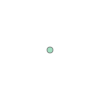

In [20]:
latslons['geometry'][0]

## 3.2 Visualize a GeoDataFrame <a id="3.2"></a>
#### In this section, use the GeoDataFrame and the `geoviews` python package to spatially visualize the location of the GEDI shots on a basemap and import a GeoJSON file of the spatial region of interest for the use case example: Reynolds Creek Experimental Watershed (RCEW).

In [21]:
# Define a function for visualizing GEDI points
def pointVisual(features, vdims):
    return (gvts.EsriImagery * gv.Points(features, vdims=vdims).options(tools=['hover'], height=500, width=900, size=5, 
                                                                        color='yellow', fontsize={'xticks': 10, 'yticks': 10, 
                                                                                                  'xlabel':16, 'ylabel': 16}))

#### Import a GeoJSON (shapefile) of RCEW as an additional GeoDataFrame. Note that you will need to have the GeoJSON file saved in the same directory as this Jupyter Notebook. Else you will have to give the full path to the file.

In [22]:
rcew = gp.GeoDataFrame.from_file('/bsuhome/tnde/geoscience/carbon_estimation/shapefiles/RCEW-outline_WGS84_simple.geojson')  # Import GeoJSON as GeoDataFrame

In [23]:
rcew

geometry
0  POLYGON ((-116.799 43.06089, -116.7954 43.0608...

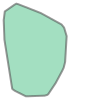

In [24]:
rcew['geometry'][0]  # Plot GeoDataFrame

#### Defining the vdims below will allow you to hover over specific shots and view information about them.

In [25]:
# Create a list of geodataframe columns to be included as attributes in the output map
vdims = []
for f in latslons:
    if f not in ['geometry']:
        vdims.append(f)
vdims

['Beam', 'Shot Number', 'Quality Flag']

#### Below, combine a plot of the RCEW Boundary (combine two `geoviews` plots using `*`) with the point visual mapping function defined above in order to plot (1) the representative GEDI shots, (2) the region of interest, and (3) a basemap layer. 

In [26]:
# Call the function for plotting the GEDI points
gv.Polygons(rcew['geometry']).opts(line_color='red', color=None) * pointVisual(latslons, vdims = vdims)

bokeh backend could not plot any Elements in the Overlay.

:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]   (Beam,Shot Number,Quality Flag)

#### Above is a good illustration of the new GEDI _Version 2_ sub-orbit granules (remember that GEDI _Version 1_  files are stored as one ISS orbit). One of the benefits of using geoviews is the interactive nature of the output plots. Use the tools to the right of the map above to zoom in and find the shots intersecting RCEW. 
<!-- > (**HINT**: find where the orbit intersects the west coast of the United States) -->

#### Side Note: Wondering what the 0's and 1's for `quality_flag` mean?

In [28]:
print(f"Quality Flag: {gediL2A[b]['elev_lowestmode'].attrs['description']}")

Quality Flag: elevation of center of lowest mode relative to reference ellipsoid


#### Above, 0 is poor quality and a quality_flag value of 1 indicates the laser shot meets criteria based on energy, sensitivity, amplitude, and real-time surface tracking quality. We will show an example of how to quality filter GEDI data in section 6.1.
#### After finding one of the shots within RCEW, find the index for that shot number so that we can find the correct RH metrics to visualize in Section 4. 

#### Each GEDI shot has a unique shot identifier (shot number) that is available within each data group of the product. The shot number is important to retain in any data subsetting as it will allow the user to link any shot record back to the original orbit data, and to link any shot and its data between the L1 and L2 products. The standard format  for GEDI Shots is as follows:

### Shot: 136740600300539400
**13674**: Orbit Number      
**06**: Beam Number    
**0**: Reserved for future use     
**03**: Sub-orbit Granule Number    
**005**: Minor frame number   
**39400**: Shot index  

In [27]:
del latslons  # No longer need the geodataframe used to visualize the full GEDI orbit


# 4. Work with GEDI L2A Data<a id="L2A"></a>
### Interpretation of RH Metrics
#### The GEDI L2A data product provides relative height (RH) metrics, which are “lidar perceived” metrics that have the following characteristics:
    1. RH100 = elev_highestreturn - elev_lowestmode
    2. The RH metrics are intended for vegetated surfaces. Results over bare/water surfaces are still valid but may present some confusing results.
    3. The lower RH metrics (e.g., RH10) will often have negative values, particularly in low canopy cover conditions. This is because a relatively high fraction of the waveform energy is from the ground and below elev_lowestmode. For example, if the ground return contains 30% of the energy, then RH1 through 15 are likely to be below 0 since half of the ground energy from the ground return is below the center of the ground return, which is used to determine the mean ground elevation in the footprint (elev_lowestmode).

####  In this section, import and extract a specific GEDI L2A shot. From there, plot relative height (RH) metrics, and then combine with the L1B full waveform data. Note that we will continue to use `BEAM0110` from Section 3. 

## 4.1 Import and Extract Specific Shots
#### Notice that there are thousands of datasets available in the GEDI L2A product. In the code blocks below, you will subset to just a few of the datasets available.

In [28]:
len(gediSDS)

4320

In [29]:
beamNames

['BEAM0110']

#### Begin by subsetting just to the selected full power beam:

In [30]:
beamSDS = [g for g in gediSDS if beamNames[0] in g]  # Subset to a single beam
len(beamSDS)

540

### We will set the shot index used as an example from the GEDI L1B Tutorial (`GEDI_L1B_V2_demo_rcew.ipynb`) to show how to subset a single shot of GEDI L2A data.

In [31]:
shot = 136740600300539400

In [32]:
index = np.where(gediL2A[f'{beamNames[0]}/shot_number'][()]==shot)[0][0]  # Set the index for the shot identified above
index = int(index)
index

57400

## 4.2 Plot Relative Height Metrics
#### In section 4.2, import the relative height metrics and begin exploring how to plot them.

In [33]:
rh = gediL2A[[g for g in beamSDS if g.endswith('/rh')][0]]  # Relative Height Metrics

#### Print the description for the `rh` dataset to better understand relative height (RH) metrics.

In [34]:
print(f"rh is {rh.attrs['description']}")

rh is Relative height metrics at 1 % interval


### New with Version 2: 
#### The GEDI L2A product provides waveform processing results for multiple algorithm settings. Results for a default algorithm selection are provided in the root directory of the data product for each beam. In GEDI Version 1, the default for all shots was algorithm setting group 1. 
### In Version 2, the default algorithm is set to the best performing algorithm based on a number of characteristics for that specific shot. For information on selecting the non-default algorithm, see section 4.4 below. Below, bring in the `selected_algorithm` dataset to determine which algorithm (1-6) was set to the default for our shot. 

In [35]:
algo = gediL2A[f'{beamNames[0]}/selected_algorithm']  # selected algorithm
print(f"selected_algorithm is {algo.attrs['description']}")

selected_algorithm is ID of algorithm selected as identifying the lowest non-noise mode


#### Next, bring in other useful L2A datasets such as `lat_lowestmode` and `lon_lowestmode`.

In [36]:
# Bring in the desired SDS
lats = gediL2A[f'{beamNames[0]}/lat_lowestmode']  # Latitude
lons = gediL2A[f'{beamNames[0]}/lon_lowestmode']  # Longitude

#### Grab the location, relative height metrics, and algorithm for the shot defined above:

In [37]:
rhLat = lats[index]
rhLon = lons[index]
rhShot1 = rh[index]
algoShot1 = algo[index]

#### Put everything together to identify the shot that we want to extract:

In [38]:
print(f"The shot is located at: {str(rhLat)}, {str(rhLon)} (shot ID: {shot}, index {index}) and is from beam {beamNames[0]}.")
print(f"The selected algorithm is Algorithm Setting Group {str(algoShot1)}.")

The shot is located at: 43.20662896150051, -116.78376294451456 (shot ID: 136740600300539400, index 57400) and is from beam BEAM0110.
The selected algorithm is Algorithm Setting Group 1.


#### In order to plot the RH metrics, you also need to import the elevation recorded at `elev_lowestmode` (the first elevation recorded) and `elev_highestreturn` or the last elevation recorded for that waveform.

In [39]:
# Grab the elevation recorded at the start and end of the RH metrics
zElevation = gediL2A[[g for g in beamSDS if g.endswith('/elev_lowestmode')][0]][index]  # Elevation
zTop = gediL2A[[g for g in beamSDS if g.endswith('/elev_highestreturn')][0]][index]     # Elevation Highest Return

#### Below, convert canopy height to canopy elevation by adding the ground elevation to each RH 1% interval.

In [40]:
rhShot = [z + zElevation for z in rhShot1]  # To convert canopy height to canopy elevation, add the elevation to each value
rh25 = rhShot[24]                           # 25% 
rh50 = rhShot[49]                           # 50%  
rh75 = rhShot[74]                           # 75% 

In [41]:
# len(rhShot1)
# rhShot1

#### Next, use the `holoviews` (hv) package to make a line plot showing the elevation at each percentile for the selected shot.

In [42]:
rhVis = hv.Curve(rhShot, label=f'Selected Algorithm (a{str(algoShot1)})')
rhVis = rhVis.opts(color='black', tools=['hover'], height=500, width=400, title='GEDI L2A Relative Height Metrics', 
                   xlabel='Percent Energy Returned', ylabel='Elevation (m)', xlim=(0,100),ylim=(np.min(rhShot),np.max(rhShot)), 
                   fontsize={'title':14, 'xlabel':16, 'ylabel': 16, 'legend': 14, 'xticks':12, 'yticks':12}, line_width=3.5)
rhVis

:Curve   [x]   (y)

### The plot above is the relative cumulative RH profile.
#### The `rh` dataset stores the relative height metrics at 1% intervals, and thus each shot contains 101 values representing rh at 0-100%.

#### Next, add some additional context to the cumulative RH profile, including metrics such as the `elev_lowestmode` (ground elevation), the `elev_highestreturn` (highest reflecting surface height), and the relative height metrics at each quartile.

In [43]:
# Create plots for L2A Metrics
zX = [0,100]                   # set up list from 0 to 100 to create the line
zY = [zElevation, zElevation]  # ground elevation
zT = [zTop, zTop]              # highest return

# Set up plots for each of the desired values
zVis = hv.Curve((zX, zY), label='Ground Return').opts(color='saddlebrown', tools=['hover'], height=550, width=400, line_width=2)
ztVis = hv.Curve((zX, zT), label='RH100').opts(color='red', tools=['hover'], height=550, width=400, line_width=2)
rh25Vis = hv.Curve((zX, [rh25,rh25]),label='RH25').opts(color='lightblue',tools=['hover'], height=550, width=400, line_width=2)
rh50Vis = hv.Curve((zX, [rh50,rh50]),label='RH50').opts(color='mediumblue',tools=['hover'], height=550, width=400, line_width=2)
rh75Vis = hv.Curve((zX, [rh75,rh75]),label='RH75').opts(color='darkblue',tools=['hover'], height=550, width=400, line_width=2)

In [44]:
# Plot all of the metrics together
l2aVis = rhVis * zVis * ztVis * rh25Vis * rh50Vis * rh75Vis
l2aVis.opts(show_legend=True, legend_position='top_right', title='GEDI L2A Relative Height Metrics', ylabel='Elevation (m)',
                   xlabel='Percent Energy Returned', xlim=(0, 100), ylim=(np.min(rhShot) + 1.5, np.max(rhShot) + 5), height=600,
                   fontsize={'title':16, 'xlabel':16, 'ylabel': 16, 'legend': 14, 'xticks':12, 'yticks':12}, width=500)

:Overlay
   .Curve.Selected_Algorithm_left_parenthesis_a1_right_parenthesis :Curve   [x]   (y)
   .Curve.Ground_Return                                            :Curve   [x]   (y)
   .Curve.RH100                                                    :Curve   [x]   (y)
   .Curve.RH25                                                     :Curve   [x]   (y)
   .Curve.RH50                                                     :Curve   [x]   (y)
   .Curve.RH75                                                     :Curve   [x]   (y)

<!-- #### Based on the figure above, it looks like the densest portion of the tree canopy for this shot is at around 45-55 meters.  -->

## 4.3 Combine RH Metrics and Waveforms

### You will need to have the `shot_136740600300539400_waveform.csv` file to execute the section below.

In [45]:
waveform_csv = '/Users/titus/BSU/remote_sensing/carbon_estimation/data/gedi_data/GEDI01_B_002_may21_to_july21/output/shot_136740600300539400_waveform.csv'
wvDF = pd.read_csv(waveform_csv)
wvDF

Amplitude (DN)  Elevation (m)
0         227.80740    1269.831871
1         226.94753    1269.682271
2         226.24248    1269.532670
3         226.06170    1269.383069
4         226.42316    1269.233469
..              ...            ...
747       229.14352    1158.080199
748       229.81010    1157.930599
749       230.45453    1157.780998
750       230.77364    1157.631397
751       230.61660    1157.481797

[752 rows x 2 columns]

#### Next, create a `holoviews` curve plot of the waveform. If you are interested in learning more about plotting L1B waveforms, be sure to check out the GEDI L1B Tutorial.

In [46]:
# Create a holoviews interactive Curve plot with additional parameters defining the plot aesthetics 
visL1B = hv.Curve(wvDF).opts(color='darkgreen', tools=['hover'], height=600, width=400,
           xlim=(np.min(wvDF['Amplitude (DN)']) - 10, np.max(wvDF['Amplitude (DN)']) + 10), 
           ylim=(np.min(wvDF['Elevation (m)']), np.max(wvDF['Elevation (m)'])),
           fontsize={'xticks':10, 'yticks':10,'xlabel':16, 'ylabel': 16, 'title':13}, line_width=2.5, title=f'{str(shot)}')
visL1B

:Curve   [Amplitude (DN)]   (Elevation (m))

#### Next, combine the L2A Relative Height (RH) metrics to the corresponding L1B waveform.

In [50]:
visL1B.opts(height=600, width=450, ylim=(np.min(rhShot), np.max(rhShot)+5), ylabel='Elevation (m)', xlabel='Amplitude (DN)') \
+ l2aVis.opts(height=600, width=500, ylim=(np.min(rhShot), np.max(rhShot)+5))

:Layout
   .Curve.I   :Curve   [Amplitude (DN)]   (Elevation (m))
   .Overlay.I :Overlay
      .Curve.Selected_Algorithm_left_parenthesis_a1_right_parenthesis :Curve   [x]   (y)
      .Curve.Ground_Return                                            :Curve   [x]   (y)
      .Curve.RH100                                                    :Curve   [x]   (y)
      .Curve.RH25                                                     :Curve   [x]   (y)
      .Curve.RH50                                                     :Curve   [x]   (y)
      .Curve.RH75                                                     :Curve   [x]   (y)

#### Above, notice the amplitude spike where the ground return is defined, and the close grouping of RH50 and RH75 over the dense portion of the upper canopy detected for this shot.

## 4.4 Select Data from the Non-Default Algorithm
#### Recall from above that the GEDI L2A product provides waveform processing results for multiple algorithm settings. Results for the selected algorithm selection are provided in the root directory of the data product for each beam. New with Version 2 is that the  selected algorithm is selected as identifying the lowest non-noise mode (see Table 5 of the [GEDI L02 User Guide](https://lpdaac.usgs.gov/documents/988/GEDI02_User_Guide_V2.pdf)). 
<!-- Algorithm Setting Group 2 is the algorithm used for the data that we extracted in the sections above. -->
> Elevation and height metrics outputs for all algorithm setting groups can be found in the `geolocation` subgroup of the L2A data product. 
For example:  
    - elev_lowestreturn_a<n> is the elevation of lowest return detected using algorithm setting group <n> 
    - rh_a<n> are the relative height metrics at 1% intervals using algorithm <n> (in cm).  

#### In some cases, the selection of an alternative algorithm setting will provide a better result. See the [GEDI L02A User Guide](https://lpdaac.usgs.gov/documents/988/GEDI02_User_Guide_V2.pdf) for additional information.

In [51]:
geolocationSDS = [b for b in beamSDS if '/geolocation/' in b]  # Select all datasets within the geolocation subgroup

#### Next, select the datasets for Algorithm Setting Group 3 (`a3`).

In [52]:
a3SDS = [g for g in geolocationSDS if g.endswith('a3')]  # Select algorithm 3 datasets
a3SDS

['BEAM0110/geolocation/elev_highestreturn_a3',
 'BEAM0110/geolocation/elev_lowestmode_a3',
 'BEAM0110/geolocation/elev_lowestreturn_a3',
 'BEAM0110/geolocation/elevs_allmodes_a3',
 'BEAM0110/geolocation/energy_lowestmode_a3',
 'BEAM0110/geolocation/lat_highestreturn_a3',
 'BEAM0110/geolocation/lat_lowestmode_a3',
 'BEAM0110/geolocation/lat_lowestreturn_a3',
 'BEAM0110/geolocation/lats_allmodes_a3',
 'BEAM0110/geolocation/lon_highestreturn_a3',
 'BEAM0110/geolocation/lon_lowestmode_a3',
 'BEAM0110/geolocation/lon_lowestreturn_a3',
 'BEAM0110/geolocation/lons_allmodes_a3',
 'BEAM0110/geolocation/num_detectedmodes_a3',
 'BEAM0110/geolocation/quality_flag_a3',
 'BEAM0110/geolocation/rh_a3',
 'BEAM0110/geolocation/sensitivity_a3']

#### Repeat Section 4.2 for Algorithm Setting Group 3.

In [53]:
# Bring in the desired SDS
lata3 = gediL2A[[a for a in a3SDS if a.endswith('/lat_lowestmode_a3')][0]][index]          # Latitude
lona3 = gediL2A[[a for a in a3SDS if a.endswith('/lon_lowestmode_a3')][0]][index]          # Latitude
rhShot1 = gediL2A[[a for a in a3SDS if a.endswith('/rh_a3')][0]][index] / 100              # Relative height metrics
zElevationa3 = gediL2A[[a for a in a3SDS if a.endswith('/elev_lowestmode_a3')][0]][index]  # Elevation
zTopa3 = gediL2A[[a for a in a3SDS if a.endswith('/elev_highestreturn_a3')][0]][index]     # Elevation Highest Return
rhShota3 = [z + zElevationa3 for z in rhShot1]  # To convert canopy height to canopy elevation, add the elevation to each value

#### Notice above that the non-default algorithm RH metrics are stored in cm, so we convert to meters by dividing by 100.

In [54]:
rhVisA3 = hv.Curve(rhShota3, label='Algorithm Setting Group 3 (a3)')
rhVisA3 = rhVisA3.opts(color='green', tools=['hover'], height=500, width=450, title='GEDI L2A Relative Height Metrics (a3)', 
                   xlabel='Percent Energy Returned', ylabel='Elevation (m)', xlim=(0,100),ylim=(np.min(rhShot),np.max(rhShot)), 
                   fontsize={'title':14, 'xlabel':16, 'ylabel': 16, 'legend': 14, 'xticks':12, 'yticks':12}, line_width=3.5)
rhVisA3

:Curve   [x]   (y)

#### Next, combine with the relative height metrics from the selected algorithm (Algorithm Setting Group 2):

In [55]:
(rhVis * rhVisA3).opts(show_legend=True, legend_position='bottom_right', title='GEDI L2A Relative Height Metrics by Algorithm',
                       ylabel='Elevation (m)', xlabel='Percent Energy Returned', xlim=(0, 100), 
                       ylim=(np.min(rhShot) - 1.5, np.max(rhShot) + 1.5), height=600, width=600,
                   fontsize={'title':16, 'xlabel':16, 'ylabel': 16, 'legend': 14, 'xticks':12, 'yticks':12})

:Overlay
   .Curve.Selected_Algorithm_left_parenthesis_a1_right_parenthesis        :Curve   [x]   (y)
   .Curve.Algorithm_Setting_Group_3_left_parenthesis_a3_right_parenthesis :Curve   [x]   (y)

#### Above we can see slight differences in the RH values between the two algorithms, particularly in the lower and upper percentiles. 


# 5. Plot Transects <a id="#plottransects"></a>

#### Next, import a number of desired SDS layers for BEAM0110 (for the entire orbit) and create a `pandas` Dataframe to store the arrays.

In [56]:
# Open all of the desired SDS
dem = gediL2A[[g for g in beamSDS if g.endswith('/digital_elevation_model')][0]][()]
srtm = gediL2A[[g for g in beamSDS if g.endswith('/digital_elevation_model_srtm')][0]][()]
zElevation = gediL2A[[g for g in beamSDS if g.endswith('/elev_lowestmode')][0]][()]
zHigh = gediL2A[[g for g in beamSDS if g.endswith('/elev_highestreturn')][0]][()]
zLat = gediL2A[[g for g in beamSDS if g.endswith('/lat_lowestmode')][0]][()]
zLon = gediL2A[[g for g in beamSDS if g.endswith('/lon_lowestmode')][0]][()]
rh = gediL2A[[g for g in beamSDS if g.endswith('/rh')][0]][()]
quality = gediL2A[[g for g in beamSDS if g.endswith('/quality_flag')][0]][()]
degrade = gediL2A[[g for g in beamSDS if g.endswith('/degrade_flag')][0]][()]
sensitivity = gediL2A[[g for g in beamSDS if g.endswith('/sensitivity')][0]][()]
shotNums = gediL2A[f'{beamNames[0]}/shot_number'][()]
selectedAlgorithm = gediL2A[[g for g in beamSDS if g.endswith('/selected_algorithm')][0]][()]

# Create a shot index
shotIndex = np.arange(shotNums.size)

In [57]:
canopyHeight = [r[100] for r in rh]  # Grab RH100 (index 100 for each RH metrics)

In [58]:
# Take the DEM, GEDI-produced Elevation, and RH Metrics and add to a Pandas dataframe
transectDF = pd.DataFrame({
    'Shot Index': shotIndex,
    'Shot Number': shotNums,
    'Latitude': zLat,
    'Longitude': zLon, 
    'Tandem-X DEM': dem,
    'SRTM DEM': srtm,
    'Elevation (m)': zElevation,
    'Canopy Elevation (m)': zHigh, 
    'Canopy Height (rh100)': canopyHeight,
    'Quality Flag': quality,
    'Degrade Flag': degrade, 
    'Sensitivity': sensitivity,
    'Selected Algorithm': selectedAlgorithm
})

In [59]:
transectDF

Shot Index         Shot Number   Latitude   Longitude   Tandem-X DEM  \
0                0  136740600300482000  51.776060 -155.228271 -999999.000000   
1                1  136740600300482001  51.776052 -155.227858 -999999.000000   
2                2  136740600300482002  51.776045 -155.227445 -999999.000000   
3                3  136740600300482003  51.776038 -155.227032 -999999.000000   
4                4  136740600300482004  51.776030 -155.226619 -999999.000000   
...            ...                 ...        ...         ...            ...   
169457      169457  136740600300651457   0.204925  -73.208510     226.391922   
169458      169458  136740600300651458   0.204482  -73.208220     231.300339   
169459      169459  136740600300651459   0.204055  -73.207926     231.300339   
169460      169460  136740600300651460   0.203652  -73.207623     236.110779   
169461      169461  136740600300651461   0.203231  -73.207326     236.110779   

             SRTM DEM  Elevation (m)  Canopy Elevation (m)  \
0      -999999.000000    5683.647461           5683.647461   
1      -999999.000000    5683.656250           5683.656250   
2      -999999.000000    5683.665039           5683.665039   
3      -999999.000000    5683.674316           5683.674316   
4      -999999.000000    5683.683105           5683.683105   
...               ...            ...                   ...   
169457     223.882462    7756.708496           7756.708496   
169458     225.880890    7703.670410           7721.224121   
169459     228.879700    7689.134766           7691.604980   
169460     231.877304    7733.938965           7733.938965   
169461     232.875717    7734.062500           7734.062500   

        Canopy Height (rh100)  Quality Flag  Degrade Flag  Sensitivity  \
0                    0.000000             0             0     4.425515   
1                    0.000000             0             0     8.071312   
2                    0.000000             0             0  -122.925842   
3                    0.000000             0             0   -91.204468   
4                    0.000000             0             0     5.511496   
...                       ...           ...           ...          ...   
169457               0.000000             0            70     0.873922   
169458              17.549999             0            70     0.954197   
169459               2.470000             0            70     0.971515   
169460               0.000000             0            70     0.866685   
169461               0.000000             0            70     0.880782   

        Selected Algorithm  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1  
...                    ...  
169457                   1  
169458                   2  
169459                   2  
169460                   1  
169461                   1  

[169462 rows x 13 columns]

#### Notice the unusual values listed above--those shots are flagged as poor quality and will be removed in Section 5.1.
#### Now that you have the desired SDS into a `pandas` dataframe, begin plotting the entire beam transect:

In [60]:
# Plot Canopy Height
canopyVis = hv.Scatter((transectDF['Shot Index'], transectDF['Canopy Height (rh100)']))
canopyVis.opts(color='darkgreen', height=500, width=900, title=f'GEDI L2A Full Transect {beamNames[0]}',
               fontsize={'title':16, 'xlabel':16, 'ylabel': 16}, size=0.1, xlabel='Shot Index', ylabel='Canopy Height (m)')

:Scatter   [x]   (y)

#### You have plotted the GEDI sub-orbit beam transect. Notice above that things look a little messy--before we dive deeper into plotting full transects, let's quality filter the shots in the section below.

In [61]:
del canopyVis, canopyHeight, degrade, dem, quality, sensitivity, shotIndex, shotNums, zElevation, zHigh, zLat, zLon

## 5.1 Quality Filtering
#### Now that you have the desired layers imported as a dataframe for the entire beam transect, let's perform quality filtering.
#### Below, remove any shots where the `quality_flag` is set to 0 by defining those shots as `nan`. 
#### The syntax of the line below can be read as: in the dataframe, find the rows "where" the quality flag is not equal (ne) to 0. If a row (shot) does not meet the condition, set all values equal to `nan` for that row.

In [62]:
transectDF = transectDF.where(transectDF['Quality Flag'].ne(0))  # Set any poor quality returns to NaN

In [63]:
transectDF

Shot Index  Shot Number  Latitude  Longitude  Tandem-X DEM  SRTM DEM  \
0              NaN          NaN       NaN        NaN           NaN       NaN   
1              NaN          NaN       NaN        NaN           NaN       NaN   
2              NaN          NaN       NaN        NaN           NaN       NaN   
3              NaN          NaN       NaN        NaN           NaN       NaN   
4              NaN          NaN       NaN        NaN           NaN       NaN   
...            ...          ...       ...        ...           ...       ...   
169457         NaN          NaN       NaN        NaN           NaN       NaN   
169458         NaN          NaN       NaN        NaN           NaN       NaN   
169459         NaN          NaN       NaN        NaN           NaN       NaN   
169460         NaN          NaN       NaN        NaN           NaN       NaN   
169461         NaN          NaN       NaN        NaN           NaN       NaN   

        Elevation (m)  Canopy Elevation (m)  Canopy Height (rh100)  \
0                 NaN                   NaN                    NaN   
1                 NaN                   NaN                    NaN   
2                 NaN                   NaN                    NaN   
3                 NaN                   NaN                    NaN   
4                 NaN                   NaN                    NaN   
...               ...                   ...                    ...   
169457            NaN                   NaN                    NaN   
169458            NaN                   NaN                    NaN   
169459            NaN                   NaN                    NaN   
169460            NaN                   NaN                    NaN   
169461            NaN                   NaN                    NaN   

        Quality Flag  Degrade Flag  Sensitivity  Selected Algorithm  
0                NaN           NaN          NaN                 NaN  
1                NaN           NaN          NaN                 NaN  
2                NaN           NaN          NaN                 NaN  
3                NaN           NaN          NaN                 NaN  
4                NaN           NaN          NaN                 NaN  
...              ...           ...          ...                 ...  
169457           NaN           NaN          NaN                 NaN  
169458           NaN           NaN          NaN                 NaN  
169459           NaN           NaN          NaN                 NaN  
169460           NaN           NaN          NaN                 NaN  
169461           NaN           NaN          NaN                 NaN  

[169462 rows x 13 columns]

#### Below, quality filter even further by using the `degrade_flag` (Greater than zero if the shot occurs during a degrade period, zero otherwise) and the `Sensitivity` layer, using a threshold of 0.95.

#### From the GEDI Level 2 User Guide:
> Use the sensitivity metric available in L2A and L2B to select "best" data. The L2A and L2B quality_flag datasets use a conservative sensitivity threshold of 0.9 over land (0.5 over ocean), but under some conditions (e.g. dense forest) the user may benefit from selecting a higher threshold.

In [64]:
transectDF = transectDF.where(transectDF['Degrade Flag'] < 1)
# transectDF = transectDF.where(transectDF['Sensitivity'] > 0.95)
transectDF = transectDF.where(transectDF['Sensitivity'] > 0.90)

#### Below, drop all of the shots that did not pass the quality filtering standards outlined above from the `transectDF`.

In [65]:
transectDF = transectDF.dropna()  # Drop all of the rows (shots) that did not pass the quality filtering above

In [66]:
print(f"Quality filtering complete, {len(transectDF)} high quality shots remaining.")

Quality filtering complete, 39534 high quality shots remaining.


## 5.2 Plot Beam Transects
#### Next, plot the full remaining transect of high quality values using `holoviews` Scatter(). Combine the Tandem-X derived elevation, SRTM elevation (New to Version 2!), the GEDI-derived elevation, and the Canopy Top Elevation in a combined holoviews plot.

In [67]:
# Remove any shots where there is no Tandem-X Elevation values 
transectDF = transectDF.where(transectDF['Tandem-X DEM'] != -999999.0).dropna()

# Plot Digital Elevation Model
demVis = hv.Scatter((transectDF['Shot Index'], transectDF['Tandem-X DEM']), label='Tandem-X DEM')
demVis = demVis.opts(color='black', height=500, width=900, fontsize={'xlabel':16, 'ylabel': 16}, size=1.5)

In [68]:
# Remove any shots where there is no SRTM Elevation values 
transectDF = transectDF.where(transectDF['SRTM DEM'] != -999999.0).dropna()

# Plot SRTM Digital Elevation Model
srtmVis = hv.Scatter((transectDF['Shot Index'], transectDF['SRTM DEM']), label='SRTM DEM')
srtmVis = srtmVis.opts(color='darkblue', height=500, width=900, fontsize={'xlabel':16, 'ylabel': 16}, size=1.5)

In [69]:
# Plot GEDI-Retrieved Elevation
zVis = hv.Scatter((transectDF['Shot Index'], transectDF['Elevation (m)']), label='GEDI-derived Elevation')
zVis = zVis.opts(color='saddlebrown', height=500, width=900, fontsize={'xlabel':16, 'ylabel': 16}, size=1.5)

In [70]:
# Plot Canopy Top Elevation
rhVis = hv.Scatter((transectDF['Shot Index'], transectDF['Canopy Elevation (m)']), label='Canopy Top Elevation')
rhVis = rhVis.opts(color='darkgreen', height=500, width=900, fontsize={'xlabel':16, 'ylabel': 16}, size=1.5, 
                   tools=['hover'], xlabel='Shot Index', ylabel='Elevation (m)')

In [73]:
# # Combine all three scatterplots
# (demVis * srtmVis * zVis * rhVis).opts(show_legend=True, legend_position='top_left',fontsize={'title':14, 'xlabel':16, 
#                                         'ylabel': 16}, title=f'{beamNames[0]} Full Transect: {L2A.split(".")[0]}')

# Combine all three scatterplots
(demVis * srtmVis * zVis * rhVis).opts(show_legend=True, legend_position='top_left',fontsize={'title':14, 'xlabel':16, 
                                        'ylabel': 16}, title=f'{beamNames[0]} Full Transect')

:Overlay
   .Scatter.Tandem_hyphen_minus_X_DEM           :Scatter   [x]   (y)
   .Scatter.SRTM_DEM                            :Scatter   [x]   (y)
   .Scatter.GEDI_hyphen_minus_derived_Elevation :Scatter   [x]   (y)
   .Scatter.Canopy_Top_Elevation                :Scatter   [x]   (y)

#### The plot still looks a bit messy this far zoomed out--feel free to pan, zoom, and explore different areas of the plot. The shot plotted in section 4 was at index 57400. If you zoom into the high-quality shots between 5.000e+5 and 6.000e+5, you will find the portion of the transect intersecting RCEW.

## 5.3 Subset Beam Transects

#### Now, subset down to a smaller transect centered on the GEDI shot analyzed in the sections above.

In [69]:
print(index)

57400


In [70]:
# Grab 50 points before and after the shot visualized above
start = index - 50
end = index + 50
end
start

57350

In [71]:
# print(f"The transect begins at ({transectDF['Latitude'][start]}, {transectDF['Longitude'][start]}) and ends at ({transectDF['Latitude'][end]}, {transectDF['Longitude'][end]}).")

#### Below, subset the transect using `.loc`.

In [72]:
transectDF = transectDF.loc[start:end]  # Subset the Dataframe to only the selected region of interest over RCEW
transectDF

Shot Index   Shot Number   Latitude   Longitude  Tandem-X DEM  \
57350     57350.0  1.367406e+17  43.220773 -116.813112   1410.521240   
57351     57351.0  1.367406e+17  43.220497 -116.812525   1413.578857   
57352     57352.0  1.367406e+17  43.220221 -116.811939   1468.655518   
57353     57353.0  1.367406e+17  43.219943 -116.811353   1468.655518   
57354     57354.0  1.367406e+17  43.219662 -116.810765   1458.713745   
...           ...           ...        ...         ...           ...   
57428     57428.0  1.367406e+17  43.198743 -116.767355   1187.609985   
57429     57429.0  1.367406e+17  43.198462 -116.766770   1190.242188   
57430     57430.0  1.367406e+17  43.198181 -116.766184   1190.655029   
57431     57431.0  1.367406e+17  43.197900 -116.765598   1192.704956   
57432     57432.0  1.367406e+17  43.197618 -116.765012   1192.333252   

          SRTM DEM  Elevation (m)  Canopy Elevation (m)  \
57350  1414.657593    1419.988281           1428.938965   
57351  1434.658325    1442.048218           1451.298462   
57352  1457.659180    1465.204468           1471.758179   
57353  1470.659912    1478.465942           1482.997437   
57354  1475.660645    1478.061157           1484.839600   
...            ...            ...                   ...   
57428  1192.721680    1189.411377           1192.632080   
57429  1193.722412    1189.933960           1193.416748   
57430  1192.723267    1190.974854           1194.607544   
57431  1193.723999    1192.032837           1195.665527   
57432  1196.724854    1192.318237           1196.025757   

       Canopy Height (rh100)  Quality Flag  Degrade Flag  Sensitivity  \
57350                   8.95           1.0           0.0     0.952646   
57351                   9.25           1.0           0.0     0.952736   
57352                   6.55           1.0           0.0     0.954584   
57353                   4.53           1.0           0.0     0.955311   
57354                   6.77           1.0           0.0     0.950495   
...                      ...           ...           ...          ...   
57428                   3.22           1.0           0.0     0.931529   
57429                   3.48           1.0           0.0     0.964047   
57430                   3.63           1.0           0.0     0.968288   
57431                   3.63           1.0           0.0     0.977198   
57432                   3.70           1.0           0.0     0.975799   

       Selected Algorithm  
57350                 1.0  
57351                 1.0  
57352                 1.0  
57353                 1.0  
57354                 1.0  
...                   ...  
57428                 1.0  
57429                 1.0  
57430                 1.0  
57431                 1.0  
57432                 1.0  

[83 rows x 13 columns]

## 5.4 Plot RH Metrics Transects

#### In order to get an idea of the length of the beam transect that you are plotting, you can plot the x-axis as distance, which is calculated below.

In [73]:
# Calculate along-track distance
distance = np.arange(0.0, len(transectDF.index) * 60, 60)  # GEDI Shots are spaced 60 m apart
transectDF['Distance'] = distance                          # Add Distance as a new column in the dataframe

#### But how do you determine where the ground is? Next, create a similar plot but using the `rh` metrics from the L2A file. Notice that the `rh` metrics contain 100 values representing each percentile, so below we iterate through and append each value with the correct distance and elevation value to the list.

In [74]:
# Create lists of canopy height, distance, and canopy elevation 
rhList, distList, ceList = [], [], []
for s, i in enumerate(transectDF['Shot Index']):
    i = int(i)
    rhi = rh[i]
    for r in rhi:
        rhList.append(r)
        distList.append(distance[s])
        ceList.append(r + transectDF['Elevation (m)'][i])  # Convert to Canopy Top Elevation

#### Now plot canopy height vs. shot index as a scatter plot.

In [75]:
title = 'Relative Height Metrics (0-100) across Reynolds Creek Experimental Watershed'
hv.Scatter((distList,rhList)).opts(color='darkgreen', alpha=0.1, height=500, width=900, size=7.5, 
                                                xlabel='Distance Along Transect (m)', ylabel='Canopy Height (m)', title=title,
                                                fontsize={'title':16, 'xlabel':16, 'ylabel': 16, 'xticks':12, 'yticks':12})

:Scatter   [x]   (y)

#### Above, it looks like the transect is covering some very short vegetation, which is reasonable given our semi-arid region of interest. The graph above is showing canopy *height*, but now add elevation to get a better idea of the overall three-dimensional structure of this transect across RCEW.

In [76]:
# Plot canopy elevation instead of canopy height
rhVis = hv.Scatter((distList,ceList), label='RH 0-100').opts(color='darkgreen', alpha=0.1, height=500, width=900, size=5)

#### Next, add in the ground elevation.

In [77]:
# Plot GEDI-Retrieved Elevation
demVis = hv.Curve((transectDF['Distance'], transectDF['Elevation (m)']), label='Ground Elevation')
demVis = demVis.opts(color='black', height=500, width=900, line_width=3, xlabel='Distance Along Transect (m)',
                     ylabel='Canopy Height (m)', fontsize={'title':14, 'xlabel':16, 'ylabel': 16, 'xticks':12, 'yticks':12},
                     title='Relative Height Metrics and Elevation across Reynolds Creek Experimental Watershed')

# Plot Elevation and RH metrics together
(demVis * rhVis).opts(legend_position='top_right')

:Overlay
   .Curve.Ground_Elevation        :Curve   [x]   (y)
   .Scatter.RH_0_hyphen_minus_100 :Scatter   [x]   (y)

#### Above, you can get an idea about the terrain over the region of interest. In terms of vegetation structure, this plot is capable of showing not only which portions of the canopy are taller/shorter, but also where they are denser (darker shades of green). However, given our semi-arid region of interest the vegetation structure looks very similar across the terrain.

In [78]:
del ceList, distList, rhList, rhi

In [79]:
del beamSDS, distance, rh, transectDF

### At this point you have visualized the elevation, canopy, and vertical structure of specific footprints over RCEW, and for a transect cutting through the creek. In section 6 you will look at mapping all of the high-quality shots from all eight GEDI beams for a given region of interest in order to gain knowledge on the spatial distribution and characteristics of the canopy over RCEW. 


# 6. Spatial Visualization<a id="spatialvisualization"></a>
#### Section 6 combines many of the techniques learned above including how to import GEDI datasets, perform quality filtering, spatial subsetting, and visualization. 

## 6.1 Import, Subset, and Quality Filter All Beams

#### Below, re-open the GEDI L2A observation--but this time, loop through and import data for all 8 of the GEDI beams.

In [80]:
beamNames = [g for g in gediL2A.keys() if g.startswith('BEAM')]

In [81]:
beamNames

['BEAM0000',
 'BEAM0001',
 'BEAM0010',
 'BEAM0011',
 'BEAM0101',
 'BEAM0110',
 'BEAM1000',
 'BEAM1011']

#### Loop through each of the desired datasets (SDS) for each beam, append to lists, and transform into a `pandas` DataFrame.

In [82]:
# Set up lists to store data
shotNum, dem, zElevation, zHigh, zLat, zLon, rh25, rh98, rh100 ,quality ,degrade, sensitivity ,beamI, selectedAlgorithm = ([] for i in range(14))  

#### Below, note that we are going to pull out the relative height metrics at the 25th, 98th, and 100th (canopy height) percentiles.

In [83]:
# Loop through each beam and open the SDS needed
for b in beamNames:
    [shotNum.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/shot_number') and b in g][0]][()]]
    [dem.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/digital_elevation_model') and b in g][0]][()]]
    [zElevation.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/elev_lowestmode') and b in g][0]][()]]  
    [zHigh.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/elev_highestreturn') and b in g][0]][()]]  
    [zLat.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/lat_lowestmode') and b in g][0]][()]]  
    [zLon.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/lon_lowestmode') and b in g][0]][()]]  
    [rh25.append(h[25]) for h in gediL2A[[g for g in gediSDS if g.endswith('/rh') and b in g][0]][()]]  
    [rh98.append(h[98]) for h in gediL2A[[g for g in gediSDS if g.endswith('/rh') and b in g][0]][()]]
    [rh100.append(h[100]) for h in gediL2A[[g for g in gediSDS if g.endswith('/rh') and b in g][0]][()]]  
    [quality.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/quality_flag') and b in g][0]][()]]  
    [degrade.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/degrade_flag') and b in g][0]][()]]  
    [sensitivity.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/sensitivity') and b in g][0]][()]]  
    [beamI.append(h) for h in [b] * len(gediL2A[[g for g in gediSDS if g.endswith('/shot_number') and b in g][0]][()])]
    [selectedAlgorithm.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/selected_algorithm') and b in g][0]][()]]

#### Note that the cell above may take a few seconds to complete.

In [84]:
# Convert lists to Pandas dataframe
allDF = pd.DataFrame({
    'Shot Number': shotNum,
    'Beam': beamI,
    'Latitude': zLat,
    'Longitude': zLon,
    'Tandem-X DEM': dem,
    'Elevation (m)': zElevation,
    'Canopy Elevation (m)': zHigh,
    'Canopy Height (rh100)': rh100,
    'RH 98': rh98,
    'RH 25': rh25,
    'Quality Flag': quality,
    'Degrade Flag': degrade,
    'Sensitivity': sensitivity,
    'Selected Algorithm': selectedAlgorithm
})

In [85]:
del beamI, degrade, dem, gediSDS, rh100, rh98, rh25, quality, sensitivity, zElevation, zHigh, zLat, zLon, shotNum, selectedAlgorithm

## 6.2 Spatial Subsetting
#### Below, subset the pandas dataframe using a simple bounding box region of interest. If you are interested in spatially clipping GEDI shots to a GeoJSON region of interest, be sure to check out the GEDI-Subsetter python script available at: https://git.earthdata.nasa.gov/projects/LPDUR/repos/gedi-subsetter/browse.

In [86]:
len(allDF)

1291681

#### Over 1.2 million shots are contained in this single GEDI orbit! Below subset down to only the shots falling within this small bounding box encompassing RCEW. `RCEW` our `geopandas` geodataframe can be called for the "envelope" or smallest bounding box encompassing the entire region of interest. Here, use that as the bounding box for subsetting the GEDI shots.

In [87]:
rcew.envelope[0].bounds

(-116.8594, 43.06089, -116.6881, 43.31298)

In [88]:
minLon, minLat, maxLon, maxLat = rcew.envelope[0].bounds  # Define the min/max lat/lon from the bounds of RCEW

#### Filter by the bounding box, which is done similarly to filtering by quality in section 6.1 above.

In [89]:
allDF = allDF.where(allDF['Latitude'] > minLat)
allDF = allDF.where(allDF['Latitude'] < maxLat)
allDF = allDF.where(allDF['Longitude'] > minLon)
allDF = allDF.where(allDF['Longitude'] < maxLon)

### NOTE: It may take up to a few minutes to run the cell above.

In [90]:
allDF = allDF.dropna()  # Drop shots outside of the ROI

In [91]:
len(allDF)
allDF

Shot Number      Beam   Latitude   Longitude  Tandem-X DEM  \
48552    1.367400e+17  BEAM0000  43.275627 -116.858931   1812.571167   
48553    1.367400e+17  BEAM0000  43.275346 -116.858346   1822.554565   
48554    1.367400e+17  BEAM0000  43.275066 -116.857760   1839.929932   
48555    1.367400e+17  BEAM0000  43.274785 -116.857174   1839.929932   
48556    1.367400e+17  BEAM0000  43.274219 -116.856000   1831.761963   
...               ...       ...        ...         ...           ...   
1179764  1.367411e+17  BEAM1011  43.143426 -116.690779   1667.965820   
1179765  1.367411e+17  BEAM1011  43.143138 -116.690194   1661.131958   
1179766  1.367411e+17  BEAM1011  43.142849 -116.689609   1649.201538   
1179767  1.367411e+17  BEAM1011  43.142563 -116.689024   1627.831055   
1179768  1.367411e+17  BEAM1011  43.142274 -116.688439   1600.844727   

         Elevation (m)  Canopy Elevation (m)  Canopy Height (rh100)  RH 98  \
48552      1816.695435           1822.688599                   5.99   5.16   
48553      1824.652222           1830.870117                   6.21   5.28   
48554      1834.629395           1841.521606                   6.89   5.91   
48555      1845.220459           1850.427002                   5.20   4.41   
48556      1831.422363           1842.622070                  11.19  10.26   
...                ...                   ...                    ...    ...   
1179764    1670.836060           1680.123535                   9.28   7.52   
1179765    1652.756592           1665.452026                  12.69  10.14   
1179766    1630.793945           1644.725098                  13.93  11.57   
1179767    1622.754272           1633.127808                  10.37   8.57   
1179768    1601.327148           1616.306885                  14.97  12.92   

         RH 25  Quality Flag  Degrade Flag  Sensitivity  Selected Algorithm  
48552    -1.61           1.0          30.0     0.910424                 1.0  
48553    -1.49           0.0          30.0     0.889008                 1.0  
48554    -1.61           1.0          30.0     0.919635                 1.0  
48555    -1.64           0.0          30.0     0.888231                 1.0  
48556    -1.19           0.0          30.0     0.894250                 1.0  
...        ...           ...           ...          ...                 ...  
1179764  -2.02           1.0           0.0     0.956093                 1.0  
1179765  -2.32           1.0           0.0     0.951678                 1.0  
1179766  -2.50           1.0           0.0     0.957605                 1.0  
1179767  -3.37           1.0           0.0     0.956852                 1.0  
1179768  -0.59           1.0           0.0     0.959498                 1.0  

[2327 rows x 14 columns]

#### Notice you have drastically reduced the number of shots you are working with (which will greatly enhance your experience in plotting them below). But first, remove any poor quality shots that exist within the ROI.

In [92]:
# Set any poor quality returns to NaN
allDF = allDF.where(allDF['Quality Flag'].ne(0))
allDF = allDF.where(allDF['Degrade Flag'] < 1) 
# allDF = allDF.where(allDF['Sensitivity'] > 0.95)
allDF = allDF.where(allDF['Sensitivity'] > 0.90)
allDF = allDF.dropna()
len(allDF)

1532

#### Down to roughly 1500 shots, next create a `Shapely` Point out of each shot and insert it as the geometry column in the [soon to be geo]dataframe.

In [93]:
# Take the lat/lon dataframe and convert each lat/lon to a shapely point
allDF['geometry'] = allDF.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)

In [94]:
# Convert to geodataframe
allDF = gp.GeoDataFrame(allDF)
allDF = allDF.drop(columns=['Latitude','Longitude'])

In [96]:
allDF

Shot Number      Beam  Tandem-X DEM  Elevation (m)  \
48563    1.367400e+17  BEAM0000   1762.090332    1776.294312   
48565    1.367400e+17  BEAM0000   1748.889771    1745.499390   
48566    1.367400e+17  BEAM0000   1730.964844    1731.872437   
48567    1.367400e+17  BEAM0000   1749.262939    1737.307007   
48568    1.367400e+17  BEAM0000   1749.262939    1755.561646   
...               ...       ...           ...            ...   
1179764  1.367411e+17  BEAM1011   1667.965820    1670.836060   
1179765  1.367411e+17  BEAM1011   1661.131958    1652.756592   
1179766  1.367411e+17  BEAM1011   1649.201538    1630.793945   
1179767  1.367411e+17  BEAM1011   1627.831055    1622.754272   
1179768  1.367411e+17  BEAM1011   1600.844727    1601.327148   

         Canopy Elevation (m)  Canopy Height (rh100)  RH 98  RH 25  \
48563             1786.445312                  10.15   9.17  -1.87   
48565             1751.829712                   6.33   5.39  -2.20   
48566             1738.689697                   6.81   5.88  -0.93   
48567             1746.858521                   9.55   8.42  -0.89   
48568             1766.611450                  11.04   9.96  -1.68   
...                       ...                    ...    ...    ...   
1179764           1680.123535                   9.28   7.52  -2.02   
1179765           1665.452026                  12.69  10.14  -2.32   
1179766           1644.725098                  13.93  11.57  -2.50   
1179767           1633.127808                  10.37   8.57  -3.37   
1179768           1616.306885                  14.97  12.92  -0.59   

         Quality Flag  Degrade Flag  Sensitivity  Selected Algorithm  \
48563             1.0           0.0     0.906731                 1.0   
48565             1.0           0.0     0.900225                 1.0   
48566             1.0           0.0     0.918842                 1.0   
48567             1.0           0.0     0.920066                 1.0   
48568             1.0           0.0     0.907112                 1.0   
...               ...           ...          ...                 ...   
1179764           1.0           0.0     0.956093                 1.0   
1179765           1.0           0.0     0.951678                 1.0   
1179766           1.0           0.0     0.957605                 1.0   
1179767           1.0           0.0     0.956852                 1.0   
1179768           1.0           0.0     0.959498                 1.0   

                            geometry  
48563    POINT (-116.85189 43.27224)  
48565    POINT (-116.85071 43.27167)  
48566    POINT (-116.85012 43.27138)  
48567     POINT (-116.84954 43.2711)  
48568    POINT (-116.84895 43.27082)  
...                              ...  
1179764  POINT (-116.69078 43.14343)  
1179765  POINT (-116.69019 43.14314)  
1179766  POINT (-116.68961 43.14285)  
1179767  POINT (-116.68902 43.14256)  
1179768  POINT (-116.68844 43.14227)  

[1532 rows x 13 columns]

## 6.3 Visualize All Beams: Canopy Height and Elevation

#### Now, using the `pointVisual` function defined in section 3.2, plot the `geopandas` GeoDataFrame using `geoviews`.

In [97]:
allDF['Shot Number'] = allDF['Shot Number'].astype(str)  # Convert shot number to string

vdims = []
for f in allDF:
    if f not in ['geometry']:
        vdims.append(f)

visual = pointVisual(allDF, vdims = vdims)
visual * gv.Polygons(rcew['geometry']).opts(line_color='red', color=None)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]   (Shot Number,Beam,Tandem-X DEM,Elevation (m),Canopy Elevation (m),Canopy Height (rh100),RH 98,RH 25,Quality Flag,Degrade Flag,Sensitivity,Selected Algorithm)
   .Polygons.I :Polygons   [Longitude,Latitude]

#### Feel free to pan and zoom in to the GEDI shots in yellow. 

### Now let's plot the points in the geodataframe and add a colormap for Canopy Height (m) and Elevation (m). 

In [127]:
# Plot the basemap and geoviews Points, defining the color as the Canopy Height for each shot
(gvts.EsriImagery * gv.Points(allDF, vdims=vdims).options(color='Canopy Height (rh100)',cmap='plasma', size=3, tools=['hover'],
                                                          clim=(0,102), colorbar=True, clabel='Meters',
                                                          title='GEDI Canopy Height over Reynolds Creek Experimental Watershed',
                                                          fontsize={'xticks': 10, 'yticks': 10, 'xlabel':16, 'clabel':12,
                                                                    'cticks':10,'title':16,'ylabel':16})).options(height=500,
                                                                                                                  width=900)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Shot Number,Beam,Tandem-X DEM,Elevation (m),Canopy Elevation (m),Canopy Height (rh100),RH 98,RH 25,Quality Flag,Degrade Flag,Sensitivity,Selected Algorithm)

#### Above, notice that the entire region of interest is characterized by very short vegetation. Again, this is expected, given that our region of interest has a semi-arid ecosystem.

#### Next, take a look at the GEDI-derived elevation over the shots. Notice below that the colormap is changed to 'terrain'. 

In [128]:
(gvts.EsriImagery * gv.Points(allDF, vdims=vdims).options(color='Elevation (m)',cmap='terrain', size=3, tools=['hover'],
                                                          clim=(min(allDF['Elevation (m)']), max(allDF['Elevation (m)'])),
                                                          colorbar=True, clabel='Meters',
                                                          title='GEDI Elevation over Reynolds Creek Experimental Watershed',
                                                          fontsize={'xticks': 10, 'yticks': 10, 'xlabel':16, 'clabel':12,
                                                                    'cticks':10,'title':16,'ylabel':16})).options(height=500,
                                                                                                                  width=900)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Shot Number,Beam,Tandem-X DEM,Elevation (m),Canopy Elevation (m),Canopy Height (rh100),RH 98,RH 25,Quality Flag,Degrade Flag,Sensitivity,Selected Algorithm)

### Success! You have now learned how to start working with Version 2 GEDI L2A files in Python as well as some interesting strategies for visualizing those data in order to better understand your specific region of interest. Using this Jupyter Notebook as a workflow, you should now be able to switch to GEDI files over your specific region of interest and re-run the notebook. Good Luck!


# 7. Export Subsets as GeoJSON Files<a id="exportgeojson"></a>
#### In this section, export the GeoDataFrame as a `.geojson` file that can be easily opened in your favorite remote sensing and/or GIS software and will include an attribute table with all of the shots/values for each of the SDS layers in the dataframe.

In [120]:
gediL2A.filename  # L2A Filename

'/Users/titus/BSU/remote_sensing/carbon_estimation/gedi/data/GEDI02_A_002_may21_to_july21/GEDI02_A_2021132105712_O13674_03_T00985_02_003_02_V002.h5'

In [121]:
outName = gediL2A.filename.replace('.h5', '.json')  # Create an output file name using the input file name
outName

'/Users/titus/BSU/remote_sensing/carbon_estimation/gedi/data/GEDI02_A_002_may21_to_july21/GEDI02_A_2021132105712_O13674_03_T00985_02_003_02_V002.json'

In [122]:
allDF.to_file(outName, driver='GeoJSON')  # Export to GeoJSON

/Users/titus/miniforge3/envs/carbon/lib/python3.10/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(


In [130]:
# del allDF 
# allDF


## Contact Info:  

Email: LPDAAC@usgs.gov  
Voice: +1-866-573-3222  
Organization: Land Processes Distributed Active Archive Center (LP DAAC)¹  
Website: <https://lpdaac.usgs.gov/>  
Date last modified: 02-20-2024  

¹Work performed under USGS contract G15PD00467 for NASA contract NNG14HH33I.  